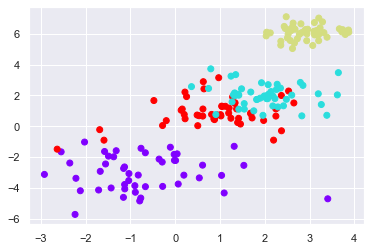

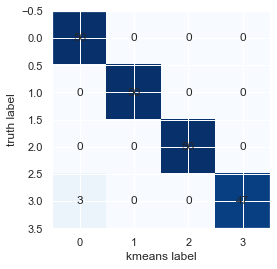

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix


data = pd.read_csv('https://raw.githubusercontent.com/Khalidsid/Kmeans_coordinates/main/cluster_table.csv')
data
x = data.iloc[:,1:3] # 1t for rows and second for columns
kmeans = KMeans(4)
model = kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)

data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.scatter(data_with_clusters['X'],data_with_clusters['Y'],c=data_with_clusters['Clusters'] , cmap='rainbow')
plt.show()
data_with_clusters

# Prep
k_labels = kmeans.labels_  # Get cluster labels
k_labels_matched = np.empty_like(k_labels)

actual_label = data_with_clusters['Cluster label'] 
kMeans_label = data_with_clusters['Clusters']

# For each cluster label...
for k in np.unique(k_labels):

    # ...find and assign the best-matching truth label
    match_nums = [np.sum((kMeans_label==k)*(actual_label==t)) for t in np.unique(actual_label)]
    k_labels_matched[kMeans_label==k] = np.unique(actual_label)[np.argmax(match_nums)]


    # Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(actual_label, k_labels_matched)

# Plot confusion matrix
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.show()




Summary of Task1:



```
TASk2
```

